<a href="https://colab.research.google.com/github/krislars/compuphys/blob/main/Capacitors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# First, set potential of plates:

In [ ]:
size=100
# Set boundaries: 0V at edges
V=np.zeros([size,size])
# Initialize with guess: 0V everywhere else

In [ ]:
# Set capacitor plates at +/-10V
V[38,25:75]=10.
V[63,25:75]=-10.

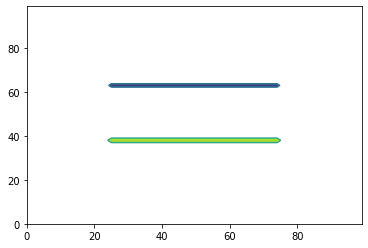

In [ ]:
plt.contour(V)

In [ ]:
mask=np.full([size,size],True)
mask[0,:]=False
mask[size-1,:]=False
mask[:,0]=False
mask[:,size-1]=False
mask[38,25:75]=False
mask[63,25:75]=False
# mask

In [ ]:
for n in range(1000):
    for i in np.arange(1,size-1):
        for j in np.arange(1,size-1):
            if mask[i,j]:
                V[i,j]=(V[i,j-1]+V[i,j+1]+V[i-1,j]+V[i+1,j])/4.
# V

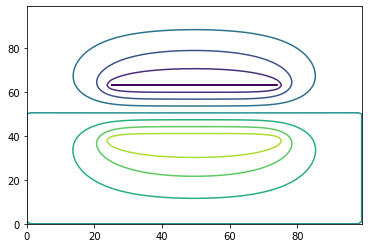

In [ ]:
plt.contour(V)

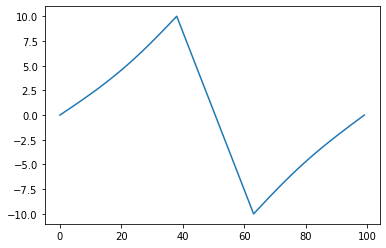

In [ ]:
plt.plot(V[:,50])

# Next, set charge of plates:

In [ ]:
size=100
# Set boundaries: 0V at edges
V=np.zeros([size,size])
# Initialize with guess: 0V everywhere else

In [ ]:
# Set capacitor plates at fixed charge, rho'
rho=np.zeros([size,size])
rho[38,25:75]=1.25
rho[63,25:75]=-1.25

In [ ]:
# Mask now allows updates at plates
mask=np.full([size,size],True)
mask[0,:]=False
mask[size-1,:]=False
mask[:,0]=False
mask[:,size-1]=False

In [ ]:
for n in range(1000):
    for i in np.arange(1,size-1):
        for j in np.arange(1,size-1):
            if mask[i,j]:
                V[i,j]=(V[i,j-1]+V[i,j+1]+V[i-1,j]+V[i+1,j])/4. + rho[i,j]/4.

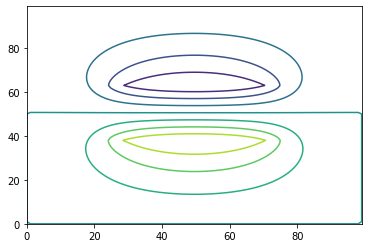

In [ ]:
plt.contour(V)

In [ ]:
np.max(V)

9.944976486663197

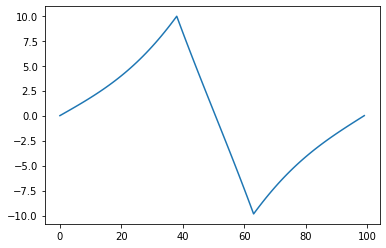

In [ ]:
plt.plot(V[:,50])

# Alternate method:  Make thicker cells.  Use the method from the first part get the potential everywhere, then **calculate** the charge at each cell

In [ ]:
size=100

V=np.zeros([size,size])

V[38,25:75]=10.
V[39,25:75]=10.
V[63,25:75]=-10.
V[64,25:75]=-10.


mask=np.full([size,size],True)
mask[0,:]=False
mask[size-1,:]=False
mask[:,0]=False
mask[:,size-1]=False
mask[38,25:75]=False
mask[39,25:75]=False
mask[63,25:75]=False
mask[64,25:75]=False

for n in range(2000):
    for i in np.arange(1,size-1):
        for j in np.arange(1,size-1):
            if mask[i,j]:
                V[i,j]=(V[i,j-1]+V[i,j+1]+V[i-1,j]+V[i+1,j])/4.

In [ ]:
rho=np.zeros([size,size])
for i in np.arange(1,size-1):
    for j in np.arange(1,size-1):
        rho[i,j]=4.*V[i,j]-(V[i,j-1]+V[i,j+1]+V[i-1,j]+V[i+1,j])

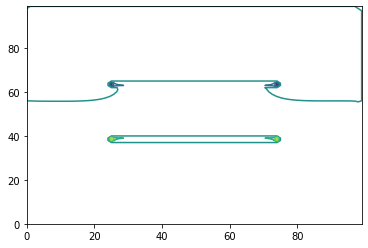

In [ ]:
plt.contour(rho)

In [ ]:
np.max(rho) # at edges of the plates!

3.523575212841152

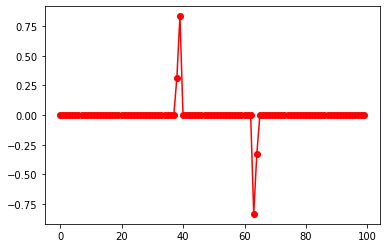

In [ ]:
plt.plot(rho[:,50],'ro-')

In [ ]:
np.max(rho[:,50])

0.8343072831544092

YAY IT WORKS!  0.8, as predicted

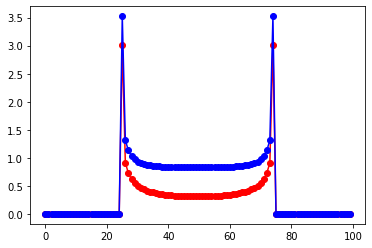

In [ ]:
plt.plot(rho[38,:],'ro-')
plt.plot(rho[39,:],'bo-')